In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pvlib
import pandas as pd

In [ ]:
# Function to calculate solar radiation for a given location
def calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped):
    # Example: Calculate solar radiation
    dni = pvlib.irradiance.disc(1, solar_position['apparent_zenith'])
    dhi = dni * jan_diffuse_global_ratio_clipped
    ghi = pvlib.irradiance.global_horizontal(1, solar_position['apparent_zenith'], solar_position['azimuth'], dni, dhi)

    # Calculate total solar radiation on the inclined surface (assuming fixed tilt)
    surface_tilt = 20  # Example: 20 degrees
    surface_azimuth = 180  # Example: South-facing
    aoi = pvlib.irradiance.aoi(surface_tilt, surface_azimuth, solar_position['apparent_zenith'], solar_position['azimuth'])
    solar_radiation = pvlib.irradiance.total_irrad(
        surface_tilt,
        surface_azimuth,
        solar_position['apparent_zenith'],
        solar_position['azimuth'],
        dni,
        ghi,
        dhi,
        dni_extra
    )

    # Extract the solar radiation values from the resulting DataFrame
    wh_per_sqmeter_per_day = solar_radiation['poa_global'].values

    return wh_per_sqmeter_per_day

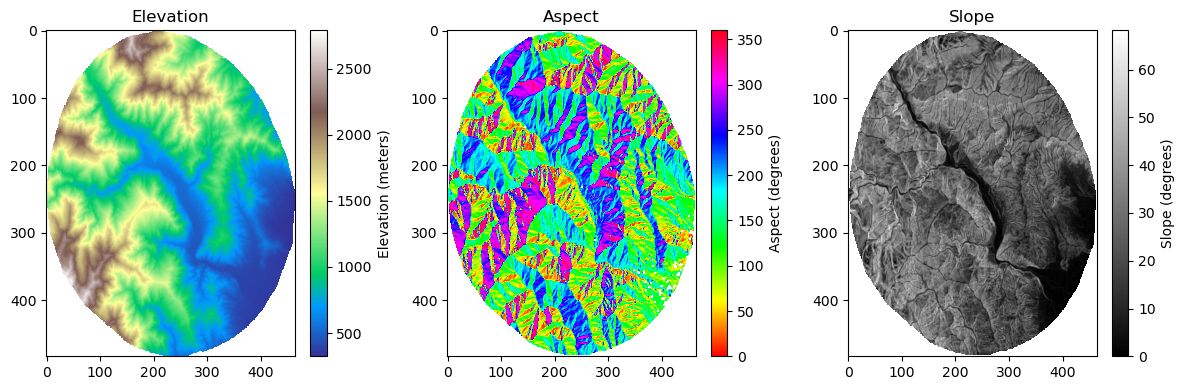

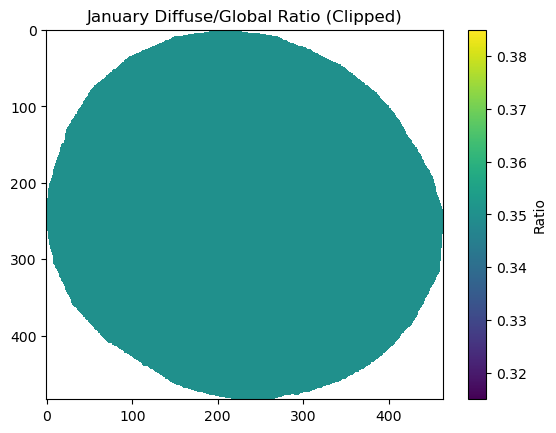

TypeError: cannot unpack non-iterable slice object

In [1]:
# Load elevation, aspect, and slope raster files
elevation_file = 'clipped-buffered.tif'
aspect_file = 'aspect.tif'
slope_file = 'slope.tif'

with rasterio.open(elevation_file) as src_elevation, rasterio.open(aspect_file) as src_aspect, rasterio.open(slope_file) as src_slope:
    # Read raster data
    elevation = src_elevation.read(1, masked=True)
    aspect = src_aspect.read(1, masked=True)
    slope = src_slope.read(1, masked=True)

    # Plot the original rasters
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.imshow(elevation, cmap='terrain', aspect='auto')
    plt.title('Elevation')
    plt.colorbar(label='Elevation (meters)')

    plt.subplot(132)
    plt.imshow(aspect, cmap='hsv', aspect='auto')
    plt.title('Aspect')
    plt.colorbar(label='Aspect (degrees)')

    plt.subplot(133)
    plt.imshow(slope, cmap='gray', aspect='auto')
    plt.title('Slope')
    plt.colorbar(label='Slope (degrees)')

    plt.tight_layout()
    plt.show()

    # Assuming jan_diffuse_global_ratio_clipped is a 2D NumPy array with values for each pixel
    jan_diffuse_global_ratio_clipped = np.full_like(elevation, 0.35)

    # Plot the jan_diffuse_global_ratio_clipped raster
    plt.imshow(jan_diffuse_global_ratio_clipped, cmap='viridis', aspect='auto')
    plt.title('January Diffuse/Global Ratio (Clipped)')
    plt.colorbar(label='Ratio')
    plt.show()

    # Get the center coordinates of each pixel
    window = rasterio.windows.Window(0, 0, src_elevation.width, src_elevation.height)
    center_coords = [src_elevation.xy(row, col) for col, row in window.toslices()]

    # Calculate solar radiation for each pixel
    wh_per_sqmeter_per_day_all_pixels = []
    for coord in center_coords:
        # Get solar position for the current location
        solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), coord[0], coord[1])
        dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

        # Extract jan_diffuse_global_ratio_clipped value for the current location
        jan_diffuse_global_ratio_clipped_value = jan_diffuse_global_ratio_clipped[int(coord[1]), int(coord[0])]

        # Calculate solar radiation for the current pixel
        wh_per_sqmeter_per_day = calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped_value)
        wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)

    # Plot the calculated solar radiation values
    plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(elevation.shape), cmap='viridis', aspect='auto')
    plt.title('Solar Radiation (Wh/m^2/day)')
    plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
    plt.show()


In [2]:
# Get the center coordinates of each pixel
window = rasterio.windows.Window(0, 0, src_elevation.width, src_elevation.height)
center_coords = [src_elevation.xy(row, col) for col, row in window.toslices()]

# Calculate solar radiation for each pixel
wh_per_sqmeter_per_day_all_pixels = []
for coord in center_coords:
    # Get solar position for the current location
    solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), coord[0], coord[1])
    dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

    # Extract jan_diffuse_global_ratio_clipped value for the current location
    jan_diffuse_global_ratio_clipped_value = jan_diffuse_global_ratio_clipped[int(coord[1]), int(coord[0])]

    # Calculate solar radiation for the current pixel
    wh_per_sqmeter_per_day = calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped_value)
    wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)

# Plot the calculated solar radiation values
plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(elevation.shape), cmap='viridis', aspect='auto')
plt.title('Solar Radiation (Wh/m^2/day)')
plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
plt.show()


TypeError: cannot unpack non-iterable slice object

In [3]:
window


Window(col_off=0, row_off=0, width=464, height=484)

In [4]:
center_coords

NameError: name 'center_coords' is not defined

In [5]:
# Get the center coordinates of each pixel
center_coords = []
for col in range(0, src_elevation.width):
    for row in range(0, src_elevation.height):
        x, y = src_elevation.xy(row, col)
        center_coords.append((x, y))

# Calculate solar radiation for each pixel
wh_per_sqmeter_per_day_all_pixels = []
for coord in center_coords:
    # Get solar position for the current location
    solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), coord[0], coord[1])
    dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

    # Extract jan_diffuse_global_ratio_clipped value for the current location
    jan_diffuse_global_ratio_clipped_value = jan_diffuse_global_ratio_clipped[int(coord[1]), int(coord[0])]

    # Calculate solar radiation for the current pixel
    wh_per_sqmeter_per_day = calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped_value)
    wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)

# Plot the calculated solar radiation values
plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(src_elevation.shape), cmap='viridis', aspect='auto')
plt.title('Solar Radiation (Wh/m^2/day)')
plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
plt.show()


IndexError: index 4989431 is out of bounds for axis 0 with size 484

In [6]:
# Get the center coordinates of each pixel
center_coords = []
for col in range(0, src_elevation.width):
    for row in range(0, src_elevation.height):
        x, y = src_elevation.xy(row, col)
        center_coords.append((x, y))

# Calculate solar radiation for each pixel
wh_per_sqmeter_per_day_all_pixels = []
for coord in center_coords:
    # Get the coordinates
    x, y = coord

    # Check if the coordinates are within the bounds
    if 0 <= x < src_elevation.width and 0 <= y < src_elevation.height:
        # Get solar position for the current location
        solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), x, y)
        dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

        # Extract jan_diffuse_global_ratio_clipped value for the current location
        jan_diffuse_global_ratio_clipped_value = jan_diffuse_global_ratio_clipped[int(y), int(x)]

        # Calculate solar radiation for the current pixel
        wh_per_sqmeter_per_day = calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped_value)
        wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)
    else:
        print(f"Skipping out-of-bounds coordinate: {coord}")

# Plot the calculated solar radiation values
plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(src_elevation.shape), cmap='viridis', aspect='auto')
plt.title('Solar Radiation (Wh/m^2/day)')
plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
plt.show()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Skipping out-of-bounds coordinate: (370374.0083, 4967481.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967431.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967381.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967331.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967281.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967231.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967181.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967131.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967081.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4967031.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4966981.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4966931.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4966881.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4966831.4708)
Skipping out-of-bounds coordinate: (370374.0083, 4966781.4708)
Skipping out-of-bounds coordinate: (370374.0083, 496673

ValueError: cannot reshape array of size 0 into shape (484,464)

In [7]:
# Calculate solar radiation for each pixel
wh_per_sqmeter_per_day_all_pixels = []
for coord in center_coords:
    # Get the coordinates
    x, y = coord

    # Check if the coordinates are within the bounds
    if 0 <= x < src_elevation.width and 0 <= y < src_elevation.height:
        # Get solar position for the current location
        solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), x, y)
        dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

        # Extract jan_diffuse_global_ratio_clipped value for the current location
        jan_diffuse_global_ratio_clipped_value = jan_diffuse_global_ratio_clipped[int(y), int(x)]

        # Calculate solar radiation for the current pixel
        wh_per_sqmeter_per_day = calculate_solar_radiation(latitude, longitude, solar_position, dni_extra, jan_diffuse_global_ratio_clipped_value)
        wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)
    else:
        print(f"Skipping out-of-bounds coordinate: {coord}")

# Debug print
print(f"Number of calculated values: {len(wh_per_sqmeter_per_day_all_pixels)}")

# Plot the calculated solar radiation values
plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(src_elevation.shape), cmap='viridis', aspect='auto')
plt.title('Solar Radiation (Wh/m^2/day)')
plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
plt.show()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Skipping out-of-bounds coordinate: (368224.0083, 4982681.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982631.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982581.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982531.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982481.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982431.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982381.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982331.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982281.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982231.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982181.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982131.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982081.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4982031.4708)
Skipping out-of-bounds coordinate: (368224.0083, 4981981.4708)
Skipping out-of-bounds coordinate: (368224.0083, 498193

ValueError: cannot reshape array of size 0 into shape (484,464)

In [9]:
latitude = 44.946
longitude = 7.218


In [14]:
# Assuming jan_diffuse_global_ratio is a constant value (e.g., 103.01)
jan_diffuse_global_ratio_clipped = 103.01

# Define the size of the subset around the center
subset_size = 25

# Calculate solar radiation for each pixel in the subset around the center
wh_per_sqmeter_per_day_all_pixels = []
center_row, center_col = src_elevation.index(44.946, 7.218)
for row in range(center_row - subset_size // 2, center_row + subset_size // 2 + 1):
    for col in range(center_col - subset_size // 2, center_col + subset_size // 2 + 1):
        # Check if the pixel coordinates are within the bounds of the raster
        if 0 <= row < src_elevation.height and 0 <= col < src_elevation.width:
            coord = src_elevation.xy(row, col)
            solar_position = pvlib.solarposition.get_solarposition(pd.Timestamp('now'), coord[0], coord[1])
            dni_extra = pvlib.irradiance.get_extra_radiation(pd.Timestamp('now'))

            # Assuming you have function calculate_solar_radiation defined
            wh_per_sqmeter_per_day = calculate_solar_radiation(elevation[row, col], 
                                                               aspect[row, col], 
                                                               slope[row, col], 
                                                               latitude, longitude, 
                                                               solar_position, dni_extra, 
                                                               jan_diffuse_global_ratio_clipped)

            wh_per_sqmeter_per_day_all_pixels.append(wh_per_sqmeter_per_day)

# Debug print
print(f"Number of calculated values: {len(wh_per_sqmeter_per_day_all_pixels)}")

# Plot the calculated solar radiation values
if wh_per_sqmeter_per_day_all_pixels:
    plt.imshow(np.array(wh_per_sqmeter_per_day_all_pixels).reshape(src_elevation.shape), cmap='viridis', aspect='auto')
    plt.title('Solar Radiation (Wh/m^2/day)')
    plt.colorbar(label='Solar Radiation (Wh/m^2/day)')
    plt.show()
else:
    print("No valid coordinates for solar radiation calculation.")


Number of calculated values: 0
No valid coordinates for solar radiation calculation.
